In [11]:
#pip install python-graphblas[default]

In [2]:
import graphblas as gb
from graphblas import Matrix, Vector
from graphblas import unary, binary, monoid, semiring, dtypes

Используя python-graphblas реализовать функцию **PageRank** с параметрами из лекции.

In [3]:
def PageRank(A, damping=0.85, itermax=100, tol=1e-4):
    N = A.nrows
    A << A.apply(unary.one)
    r_i = Vector(dtypes.FP32, N)
    r_j = Vector(dtypes.FP32, N)
    r_j[:] << 1.0 / N
    rdiff = 1
    d = A.reduce_rowwise(monoid.plus).new(dtype="FP32")
    d(accum=binary.truediv)[:] << damping

    for i in range(itermax):
        if rdiff <= tol:
            break
        r_i = r_j
        r_j = A.T.mxv(r_i.ewise_mult(d, binary.truediv), semiring.plus_second) + (1 - damping) / N
        rdiff = abs(r_j - r_i).reduce(monoid.plus)

    return r_j, i

Добавить необходимые тесты и небольшие примеры.

In [4]:
A = Matrix.from_coo(
    [0, 0, 1, 2, 2, 3, 4],
    [1, 2, 3, 3, 4, 4, 0],
    [1.1, 9.8, 4.2, 7.1, 0.2, 6.9, 2.2],
)
A

"M_0"      nvals  nrows  ncols  dtype   format
gb.Matrix      7      5      5   FP64  bitmapr
----------------------------------------------
     0    1    2    3    4
0       1.1  9.8          
1                 4.2     
2                 7.1  0.2
3                      6.9
4  2.2

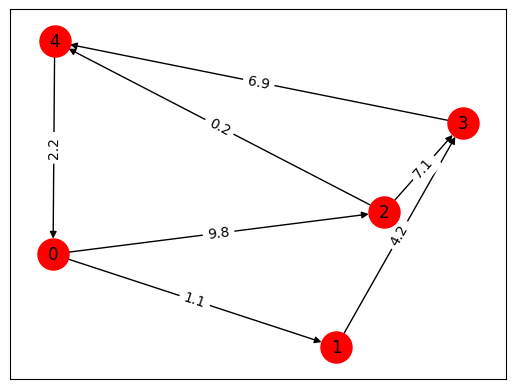

(gb.VectorExpression                                         size  dtype
v_184.apply(binary.plus[FP64], right=0.030000000000000006)     5   FP64

"Result"   nvals  size  dtype
gb.Vector      5     5   FP64
-----------------------------
index         0         1         2         3         4
value  0.254213  0.138031  0.138031  0.205973  0.263752

Do expr.new() or other << expr to calculate the expression., 37)


In [5]:
gb.viz.draw(A)
print(PageRank(A))

In [6]:
import numpy as np
matrix = np.array([[0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [1, 0, 0, 1],
                   [1, 0, 1, 0]])

graph = gb.Matrix.from_dense(matrix,missing_value=0)
graph

"M_1"      nvals  nrows  ncols  dtype   format
gb.Matrix      6      4      4  INT64  bitmapr
----------------------------------------------
   0  1  2  3
0     1      
1        1   
2  1        1
3  1     1

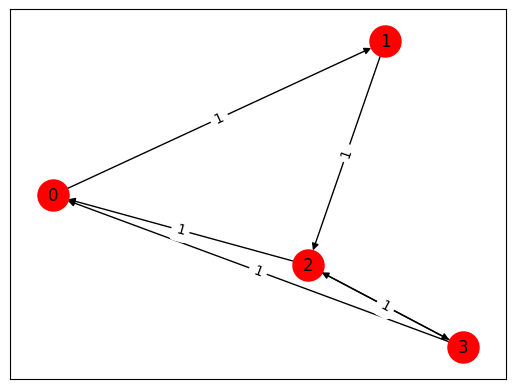

(gb.VectorExpression                                         size  dtype
v_237.apply(binary.plus[FP64], right=0.037500000000000006)     4   FP64

"Result"   nvals  size  dtype
gb.Vector      4     4   FP64
-----------------------------
index     0     1         2         3
value  0.25  0.25  0.324547  0.175453

Do expr.new() or other << expr to calculate the expression., 10)


In [7]:
gb.viz.draw(graph)
print(PageRank(graph))

In [10]:
import networkx as nx
graph_nx = gb.io.to_networkx(graph)
nx.pagerank(graph_nx, alpha=0.85, max_iter =100, tol=1e-4)

{0: 0.25, 1: 0.25, 2: 0.32459513336148926, 3: 0.1754048666385107}